# Bigmart Sales Prediction Mini Project

## Problem Statement
The Data Scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

This data science project is focused on creating a predictive model to determine the sales of each product at different stores.
#### Agenda : 
This model will help BigMart identify the key factors in products and stores that lead to higher sales.

- Analysis:
    - Supervised Learning Problem
    - Target Feature / Label : Item_Outlet_Sale
 
## Hypothesis Generation

1. Item Emphasis
    - Prominance Influence: Products strategically positioned, such as near the entrance, may drive higher sales owing to enhanced visibility. 
2. Store Emphasis
    - Urban Prosperity: Stores situated in urban locales may yield higher sales attributed to the elevated disposable income of urban inhabitants.

### Installation of ML methods for Regression

In [1]:
!pip install xgboost

## Loading Packages and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
df = pd.read_csv('Train.csv')

In [4]:
df1 = pd.read_csv('Test.csv')

## Data Structure and Content

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [8]:
df.shape

(8523, 12)

In [9]:
df1.shape

(5681, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Item_Outlet_Sales: 
Sales of the product in a particular store. This is the target variable or the label to be predicted.

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
df.select_dtypes(include="object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
df.select_dtypes(include="number").columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Missing Values Detection

In [14]:
df.isnull().sum() #missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can observe from the above data that
- ##### 1463 missing values are there in the Item_Weight feature
- ##### 2410 missing values are there in the Outlet_Size feature which is a categorical feature

In [15]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can observe from the above data that
- ##### 976 missing values are there in the Item_Weight feature
- ##### 1606 missing values are there in the Outlet_Size feature which is a categorical feature

## EDA-Exploratory Data Analysis
### Univariate Analysis

In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


### Numerical Columns

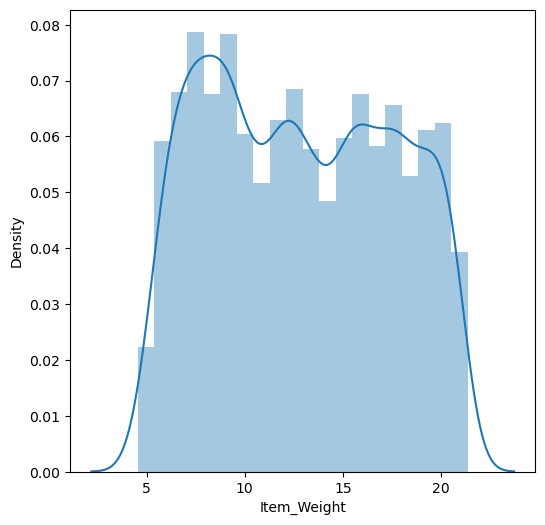

In [19]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

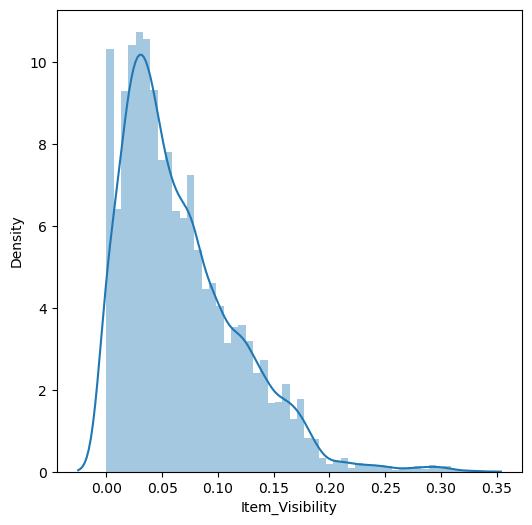

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

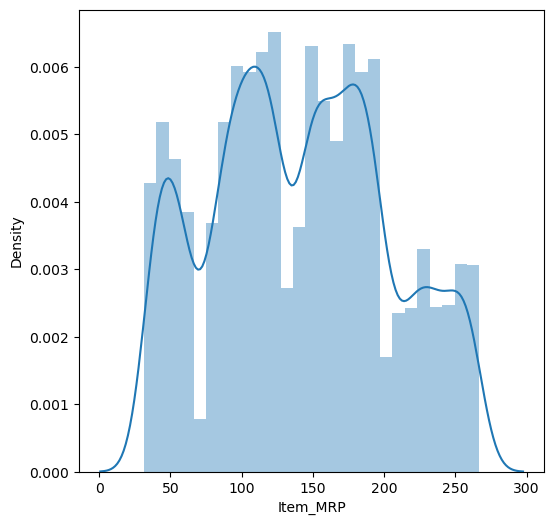

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

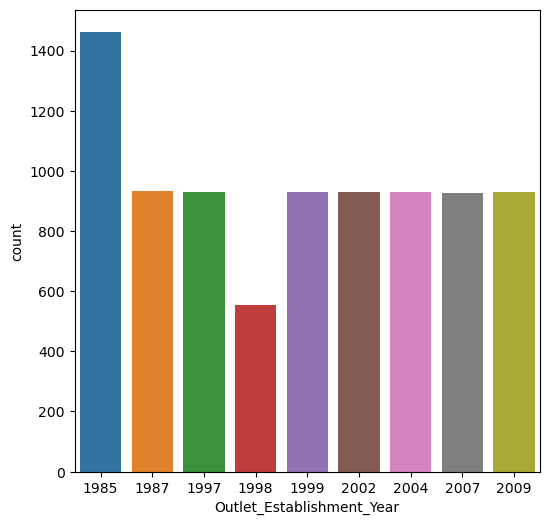

In [22]:
# Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data = df)
plt.show()

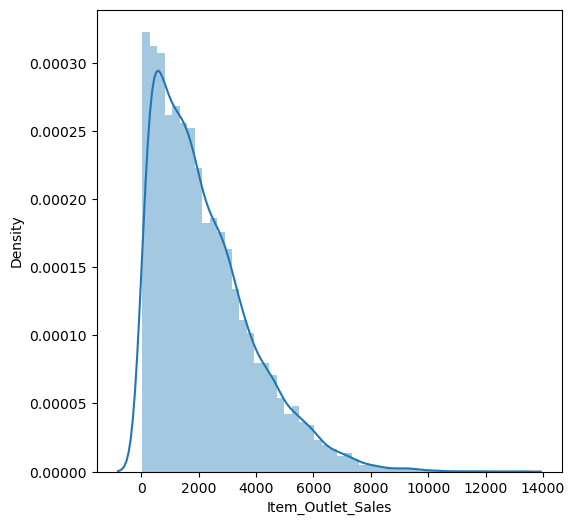

In [23]:
#Target Variable = Item_Outlet_Sales Analysis
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

### Categorical Columns

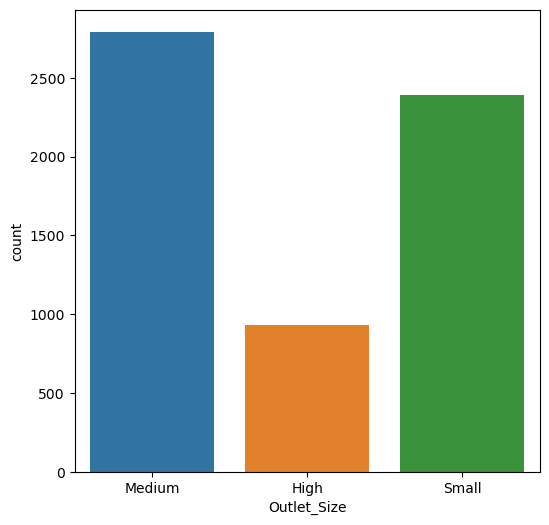

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data = df)
plt.show()

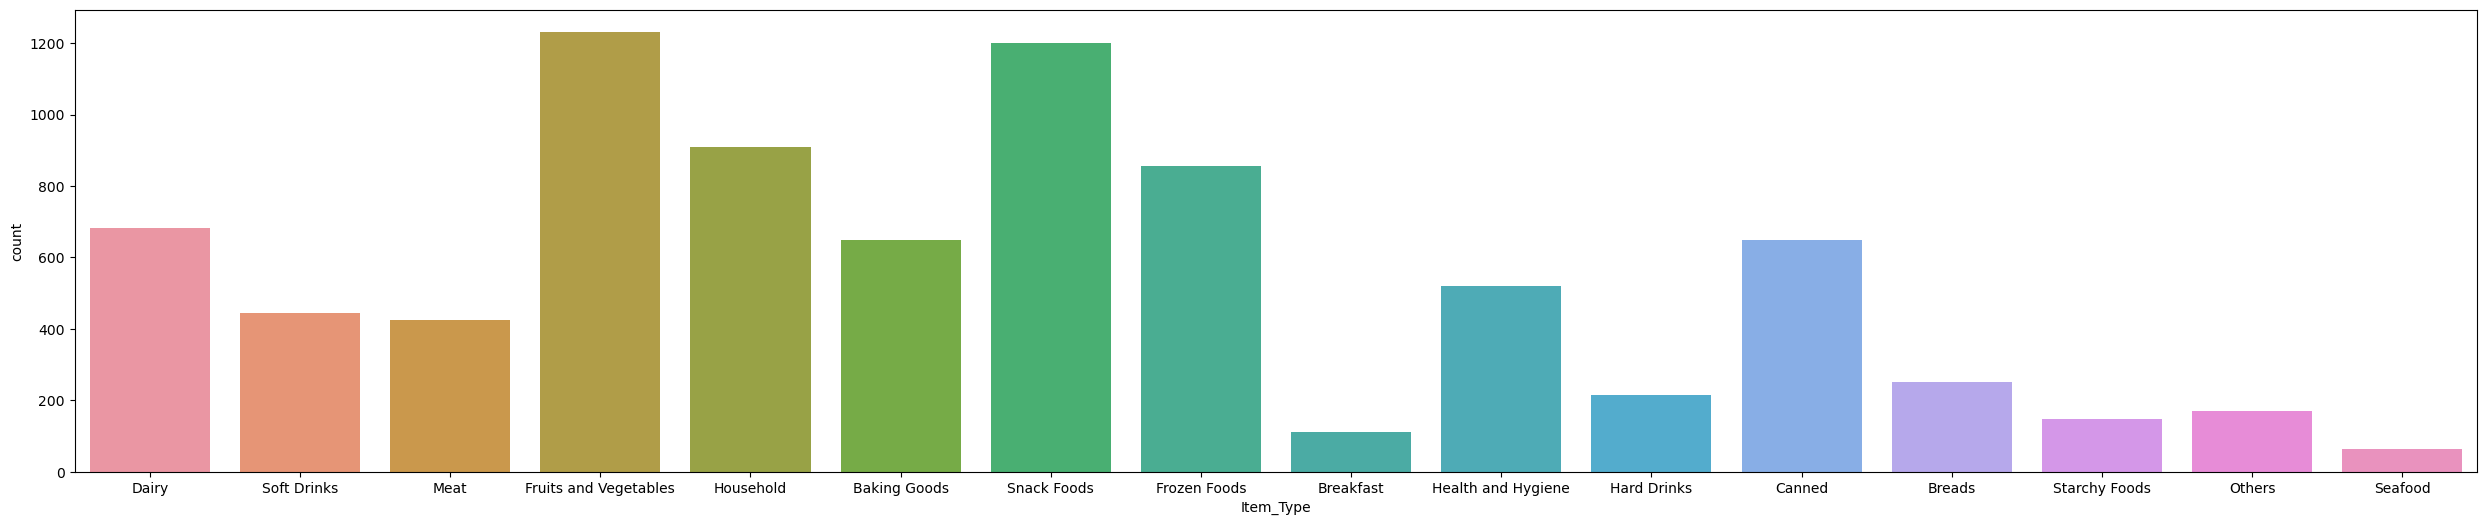

In [25]:
plt.figure(figsize=(31,6))
sns.countplot(x='Item_Type',data = df)
plt.show()

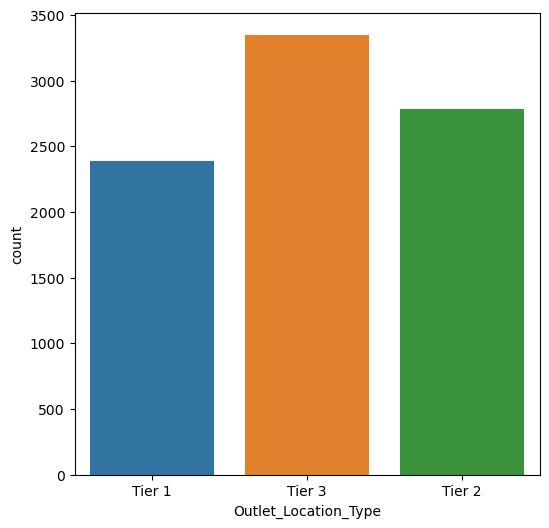

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data = df)
plt.show()

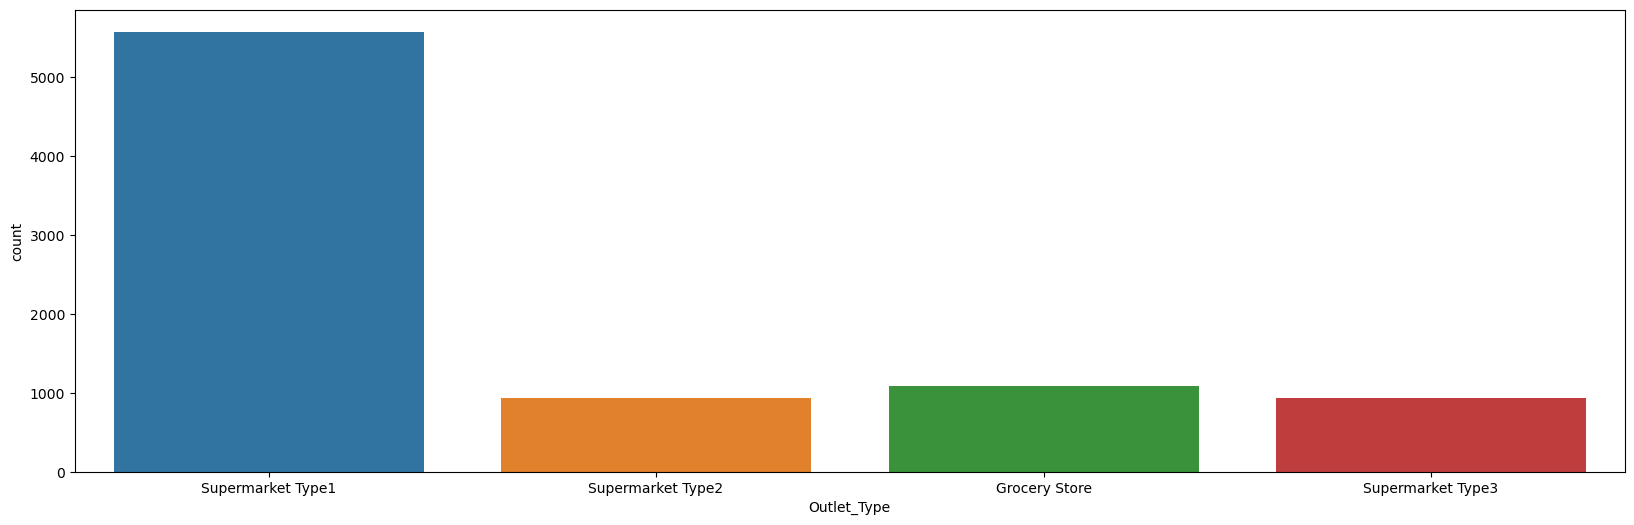

In [27]:
# Outlet_Type
plt.figure(figsize=(20,6))
sns.countplot(x='Outlet_Type',data = df)
plt.show()

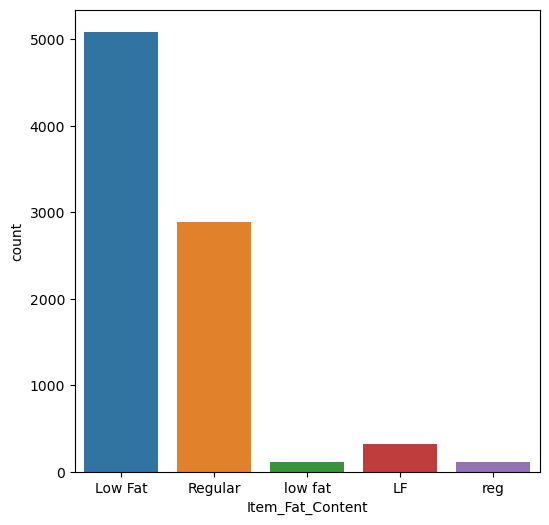

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data = df)
plt.show()

### Bivariate Analysis

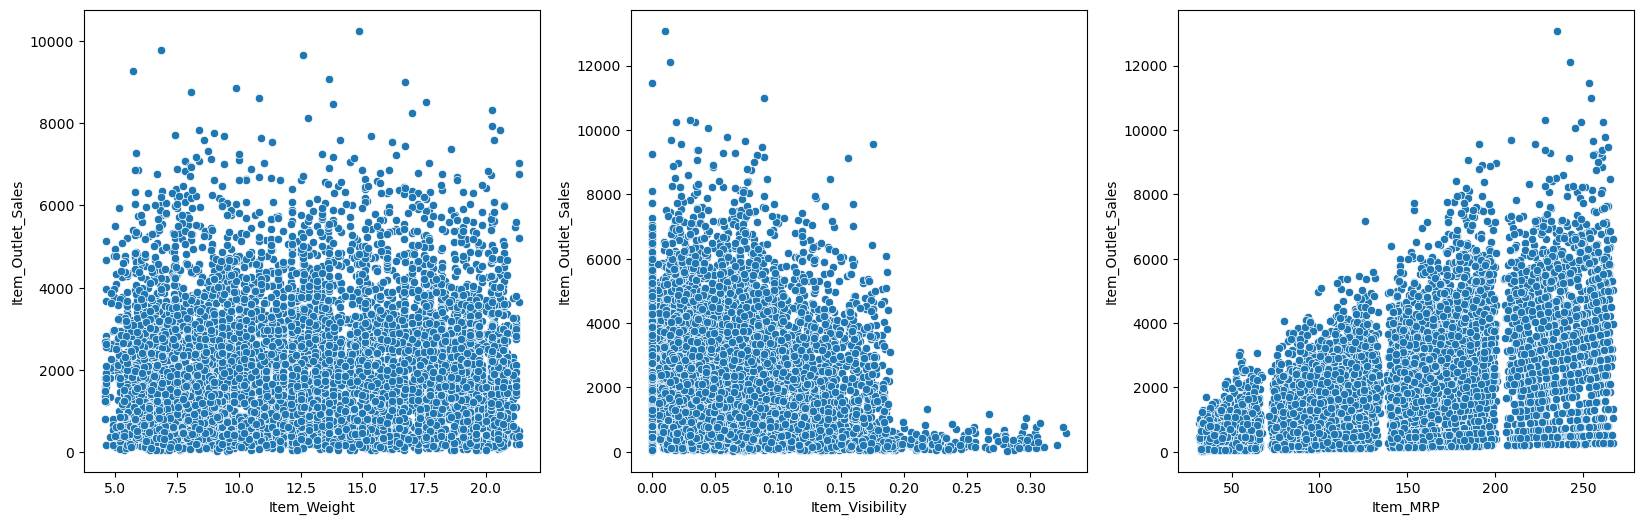

In [33]:
_, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20,6))
target = "Item_Outlet_Sales"
for index, col in enumerate(['Item_Weight','Item_Visibility','Item_MRP']):
    sns.scatterplot(data = df, x= col, y = target, ax = ax[index])

#### The above figures are the scatter plots showing the relationship between the changes observed in the 'Item_Weight','Item_Visibility','Item_MRP' and the target variabe 'Item_Outlet_Sales'

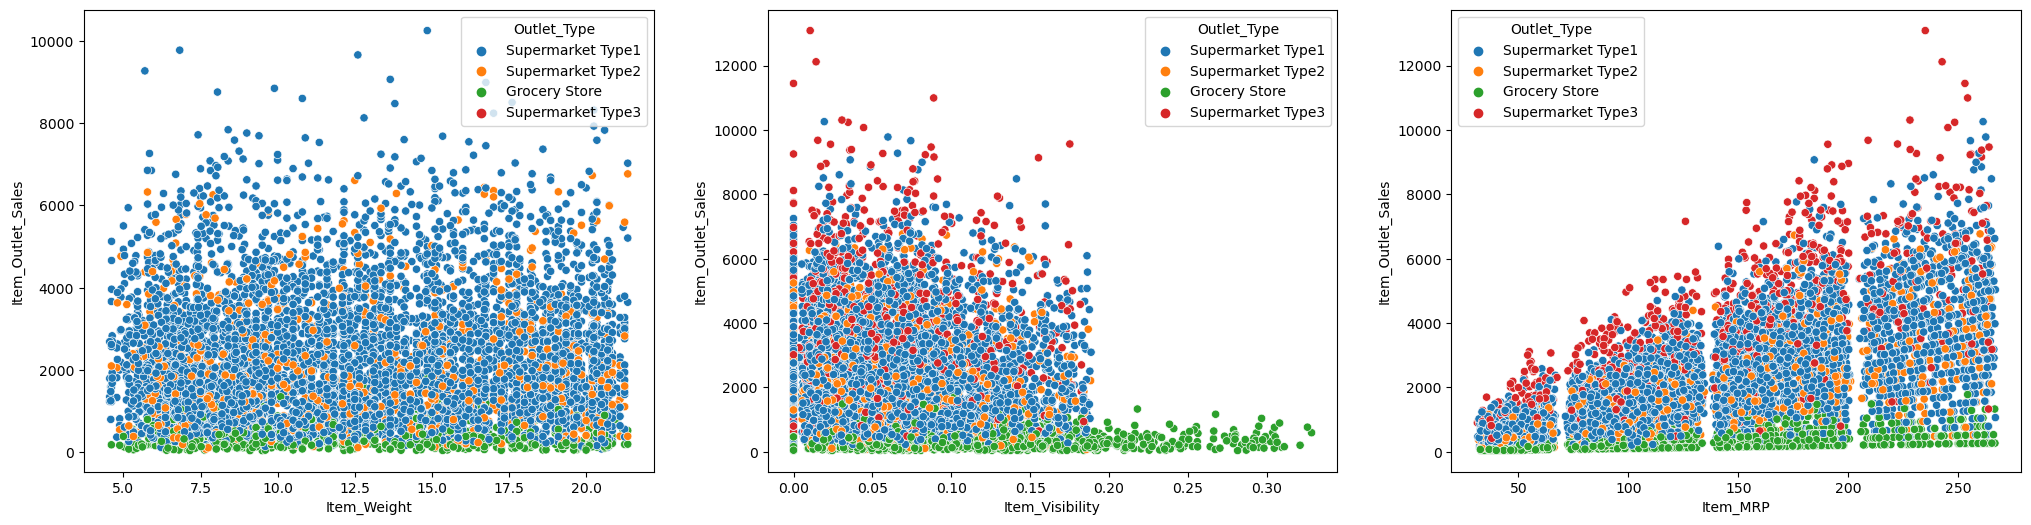

In [34]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,6))
for index, col in enumerate(['Item_Weight','Item_Visibility','Item_MRP']):
    sns.scatterplot(data= df, x=col, y = target, ax=ax[index], hue='Outlet_Type')

#### Each scatter plot visualizes the relationship between a specific feature 'Item_Weight, Item_Visibility, Item_MRP' and the target variable, with points colored by 'Outlet_Type'.

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

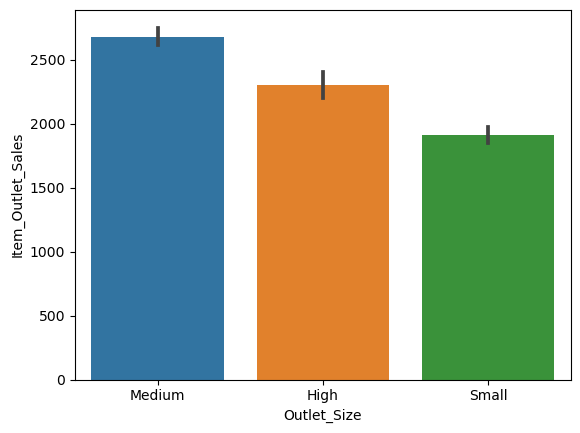

In [37]:
sns.barplot(data = df, x='Outlet_Size', y = target)

## Missing Value Treatment
##### For the train.csv file
#### (Categorical column)

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
df['Outlet_Size'] = imputer.fit_transform(df[['Outlet_Size']]).ravel()

In [39]:
df.isnull().sum() #missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### (Mean for Numerical Column)

In [40]:
df['Item_Weight'].mean()

12.857645184135976

In [41]:
#halndle the missing values in 'Item_Weight'
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)

In [42]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### The above data shows that all the missing values are handled in the train.csv file

##### For the test.csv file

In [43]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### (Categorical column)

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
df1['Outlet_Size'] = imputer.fit_transform(df1[['Outlet_Size']]).ravel()

In [45]:
df1.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

#### (Mean for Numerical Column)

In [46]:
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(),inplace = True)

In [47]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### The above data shows that all the missing values are handled in the test.csv file

## Feature Engineering

In [48]:
#Correcting Errors in the Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [49]:
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace = True)

In [50]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#### Visual Representation with Countplot

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

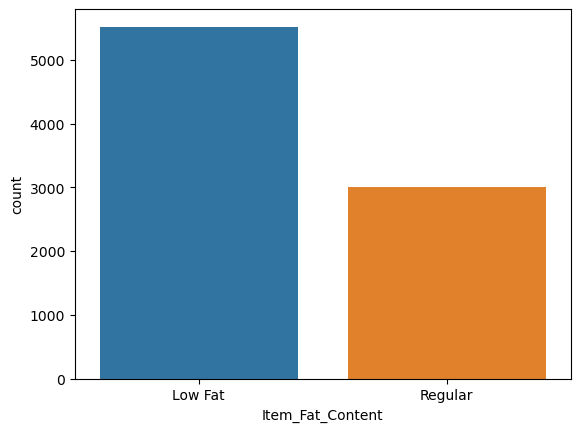

In [51]:
sns.countplot(x=df['Item_Fat_Content'])

## Encoding 
Before categorical data can be utilized as input to a machine learning model, it must first be transformed into numerical data. 
### Label Encoding

In [53]:
df.select_dtypes(include = 'object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [54]:
# Label Encoding
encoder = LabelEncoder()

In [55]:
df['Item_Identifier']= encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content']= encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type']= encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier']= encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size']= encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type']= encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type']= encoder.fit_transform(df['Outlet_Type'])

In [56]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [58]:
# Label Encoding
df1.select_dtypes(include = 'object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [59]:
encoder = LabelEncoder()

In [60]:
df1['Item_Identifier']= encoder.fit_transform(df1['Item_Identifier'])

df1['Item_Fat_Content']= encoder.fit_transform(df1['Item_Fat_Content'])

df1['Item_Type']= encoder.fit_transform(df1['Item_Type'])

df1['Outlet_Identifier']= encoder.fit_transform(df1['Outlet_Identifier'])

df1['Outlet_Size']= encoder.fit_transform(df1['Outlet_Size'])

df1['Outlet_Location_Type']= encoder.fit_transform(df1['Outlet_Location_Type'])

df1['Outlet_Type']= encoder.fit_transform(df1['Outlet_Type'])

In [61]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [62]:
print(df.shape)
print(df1.shape)

(8523, 12)
(5681, 11)


## PreProcessing Data

In [63]:
X= df.drop(columns ='Item_Outlet_Sales', axis =1)
Y= df['Item_Outlet_Sales']

In [64]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [65]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [66]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


### Splitting the taining and test set in 80% - 20% 

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [68]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


## Modeling

### 1. Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [83]:
LR_Prediction = model.predict(X_test)
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)
print('Training score : {}'.format(train_score))
print('Test score : {}'.format(test_score))

Training score : 0.514058329918831
Test score : 0.49498230467979


In [133]:
#Evaluating the model's performance
LR_mse = mean_squared_error(Y_test,LR_Prediction)
LR_rmse = math.sqrt(LR_mse)
LR_r2 = r2_score(Y_test,LR_Prediction)

In [134]:
print('Linear Regression RMSE: {}'.format(LR_rmse))
print('Linear Regression R2 Score: {}'.format(LR_r2))

Linear Regression RMSE: 1248.6101695726866
Linear Regression R2 Score: 0.49498230467979


#### The linear regression model's performance is summarized by a mean squared error (MSE) of about 1248.61 and an R-squared score of approximately 0.495. These values indicate how well the model fits the data. To make it perform better, we can consider adding polynomial features and scaling the data, which might improve its predictions.


In [89]:
from sklearn.preprocessing import StandardScaler as scaler, PolynomialFeatures as poly_transform
from sklearn.pipeline import Pipeline as pl
#Defining the pipeline components
components = [('scaling', scaler()),
    ('polynomial', poly_transform(degree=2)),
    ('regression', LinearRegression())]

pipeline = pl(components)
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('regression', LinearRegression())])

In [113]:
#Evaluating the model
train_score_1 = pipeline.score(X_train, Y_train)
test_score_1 = pipeline.score(X_test,Y_test)
print('Training score: {}'.format(train_score_1))
print('Test score: {}'.format(test_score_1))

Training score: 0.6022675745708734
Test score: 0.5796084994911831


In [136]:
#Predictions with polynomial regression model
poly_Predict = pipeline.predict(X_test)
mse_Poly = mean_squared_error(Y_test, poly_Predict)
rmse_Poly = math.sqrt(mse_Poly)
r2_Poly = r2_score(Y_test, poly_Predict)
print('Polynomial Regression RMSE: {}'.format(rmse_Poly))
print('Polynomial Regression R2 Score: {}'.format(r2_Poly))

Polynomial Regression RMSE: 1139.201461426028
Polynomial Regression R2 Score: 0.5796084994911831


### 2. Regularized Linear Regression

In [93]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

#Standardizing the features 
scaler = StandardScaler()
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test= scaler.transform(X_test)

##### Create and fit Ridge regression model

In [123]:
ridge = Ridge(alpha = 2.0)
ridge.fit(Scaled_X_train, Y_train)

Ridge(alpha=2.0)

In [124]:
# Predictions
train_Predict = ridge.predict(Scaled_X_train)
test_Predict = ridge.predict(Scaled_X_test)
train_Score = ridge.score(Scaled_X_train, Y_train)
test_Score = ridge.score(Scaled_X_test, Y_test)
print('Training Score: {}'.format(train_Score))
print('Test Score: {}'.format(test_Score))

Training Score: 0.5140582479216088
Test Score: 0.4949810961331722


In [131]:
# Evaluation 
RLR_mse = mean_squared_error(Y_test, test_Predict)
RLR_rmse = math.sqrt(RLR_mse)
RLR_r2 = r2_score(Y_test, test_Predict)
print('Regularized Linear Regression RMSE: {}'.format(RLR_rmse))
print('Regularized Linear Regression R2 Score: {}'.format(RLR_r2))

Regularized Linear Regression RMSE: 1248.6116635824098
Regularized Linear Regression R2 Score: 0.4949810961331722


### 3. RandomForest

In [71]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()
randomForest.fit(X_train, Y_train)

RandomForestRegressor()

In [72]:
RFPredict = randomForest.predict(X_test)

In [73]:
print('Training score : {}'.format(randomForest.score(X_train,Y_train)))
print('Test score : {}'.format(randomForest.score(X_test,Y_test)))

Training score : 0.939034259936025
Test score : 0.5540874633492239


In [74]:
#Evaluation Stage
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
RF_mse = mean_squared_error(Y_test,RFPredict)
RF_rmse = math.sqrt(RF_mse)
RF_r2 = r2_score(Y_test, RFPredict)

In [86]:
print('RandomForest RFMSE : {}'.format(RF_rmse))
print('RandomForest R2 Score : {}'.format(RF_r2))

RandomForest RFMSE : 1173.2712026526106
RandomForest R2 Score : 0.5540874633492239


### 4. XGBoost 

In [101]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [102]:
training_Predict = regressor.predict(X_train)
test_Predict = regressor.predict(X_test)

In [103]:
print('Training score : {}'.format(regressor.score(X_train,Y_train)))
print('Test score : {}'.format(regressor.score(X_test,Y_test)))

Training score : 0.8759287778441955
Test score : 0.5060117482714839


In [130]:
#Evaluation
XGB_mse = mean_squared_error(Y_test, test_Predict)
XGB_rmse = math.sqrt(XGB_mse)
XGB_r2 = r2_score(Y_test,test_Predict)
print('XGBoost RMSE: {}'.format(XGB_rmse))
print('XGBoost R2 Score: {}'.format(XGB_r2))

XGBoost RMSE: 1248.6116635824098
XGBoost R2 Score: 0.4949810961331722


In [137]:
#Printing all the MSE and R2 Score of every model above
print('******'*10)
print('\n')
print('Linear Regression MSE: {}'.format(LR_mse))
print('Linear Regression R2 Score: {}'.format(LR_r2))
print('\n')
print('******'*10)
print('\n')
print('Polynomial Regression RMSE: {}'.format(rmse_Poly))
print('Polynomial Regression R2 Score: {}'.format(r2_Poly))
print('\n')
print('******'*10)
print('\n')
print('Regularized Linear Regression MSE: {}'.format(RLR_mse))
print('Regularized Linear Regression R2 Score: {}'.format(RLR_r2))
print('\n')
print('******'*10)
print('\n')
print('RandomForest RMSE : {}'.format(RF_rmse))
print('RandomForest R2 Score : {}'.format(RF_r2))
print('\n')
print('******'*10)
print('\n')
print('XGBoost MSE: {}'.format(XGB_mse))
print('XGBoost R2 Score: {}'.format(XGB_r2))
print('\n')
print('******'*10)

************************************************************


Linear Regression MSE: 1559027.355560333
Linear Regression R2 Score: 0.49498230467979


************************************************************


Polynomial Regression RMSE: 1139.201461426028
Polynomial Regression R2 Score: 0.5796084994911831


************************************************************


Regularized Linear Regression MSE: 1559031.0864340332
Regularized Linear Regression R2 Score: 0.4949810961331722


************************************************************


RandomForest RMSE : 1173.2712026526106
RandomForest R2 Score : 0.5540874633492239


************************************************************


XGBoost MSE: 1559031.0864340332
XGBoost R2 Score: 0.4949810961331722


************************************************************


Based on the provided performance metrics, the Polynomial Regression model appears to have the best performance.ce.

#### Key Metrics:
1. R2 Score: Higher R2 score indicates better performance.
2. RMSE/MSE: Lower value indicates better performance.

### Final Predictions

In [138]:
# Final predictions on the test data using Polynomial Regression
final = pipeline.predict(X_test) 

## Saving the Final Model
##### (Polynomial Regression model)

In [139]:
import pickle
model_pkl = 'BSMP_model.pkl'

In [140]:
with open(model_pkl, 'wb') as file:
    pickle.dump(pipeline, file) # from polynomial regression model 

#### Visualization

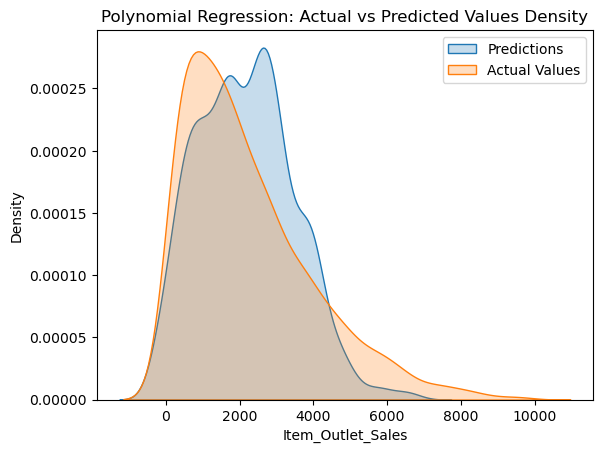

In [143]:
sns.kdeplot(final, label="Predictions", shade=True)
sns.kdeplot(Y_test, label="Actual Values", shade=True)
plt.title("Polynomial Regression: Actual vs Predicted Values Density")
plt.legend()
plt.show()

#### The above KDE(Kernel Density Estimate) Plot gives the curve representing the probability density function of a continous variable i.e., 'Item_Outlet_Sales' which is the target variable.

## Summary
The data scientists at BigMart collected 2013 sales data for 1559 products across 10 stores in different cities, along with various attributes of each product and store. The project's objective is to build a predictive model to estimate product sales at each store, thereby helping BigMart understand the key factors that drive sales. The dataset contains missing values due to technical glitches, necessitating appropriate data cleaning and imputation.

This project encompasses several steps: problem definition, hypothesis generation, data loading, exploratory data analysis, univariate and bivariate analysis, missing value treatment, feature engineering, encoding categorical variables, data preprocessing, and modeling using various machine learning algorithms, including linear regression, regularized linear regression, RandomForest, and XGBoost.

##### After evaluating multiple models, 
1. Best Performing Model: Polynomial Regression
   - Achieved the lowest RMSE of 1139.20 and the highest R2 score of 0.5796.
   - Demonstrates superior ability to capture complex relationships in the data, indicating strong predictive accuracy.2. Alternative Model: RandomForest
   - The next model which yielded commendable resultsis RandomForest.
   - Its RMSE of 1173.27 and R2 score of 0.5541 reflect its solid predictive capabilities.y.
